In [1]:
##--------------------------------------------------------------------------------
## Summary : Implement a variation of Deep Dream algorithm
## Author  : Venkata Srinivas Vemprala
## SourceCode : https://github.com/vesrinivas/DeepLearning
##--------------------------------------------------------------------------------

## kindly note that all images are taken from google

%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import Inception5h
import os
import download
import PIL.Image
from IPython.display import Image, display

import PIL.Image
from scipy.ndimage.filters import gaussian_filter

In [2]:
model = Inception5h.Inception5h()

In [3]:
# Helper function to load images
def loadImage(path):
    image = PIL.Image.open(path)
    return np.float32(image)

# Helper function to save image
def saveImage(image, path):
    # Ensure the pixel-values are between 0 and 255.
    image = np.clip(image, 0.0, 255.0)
    
    # Convert to bytes.
    image = image.astype(np.uint8)
    
    # Write the image-file in jpeg-format.
    with open(path, 'wb') as file:
        PIL.Image.fromarray(image).save(file, 'jpeg')

# plot images
def plotImage(image):
    image = np.clip(image/255.0, 0.0, 1.0)
        
    # Plot using matplotlib.
    plt.imshow(image, interpolation='spline16')
    plt.show()

In [4]:
# helper function to normalize image(using min-max normalization)
def normalize_image(x):
    xMin = np.min(image)
    xMax = np.max(image)
    
    xNorm = (x-xMin)/(xMax-xMin)

In [5]:
# print various layer names
print(model.layer_names)

['conv2d0', 'conv2d1', 'conv2d2', 'mixed3a', 'mixed3b', 'mixed4a', 'mixed4b', 'mixed4c', 'mixed4d', 'mixed4e', 'mixed5a', 'mixed5b']


In [6]:
# helper function to plot the gradients
def plotGradient(gradient):
    # Normalize the gradient
    normalizedGradient = normalize_image(gradient)
    
    # plot the image
    plt.imshow(normalizedGradient,interpolation='spline16')
    

In [7]:
def genDeepDream(image,layerName,numIterations=10,stepSize = 3.0):
    # show the image
    ## plotImage(image=image)
    
    # Get the gradient at the given layer
    gradient = model.get_gradient(layerName)
    
    # start looping and plot gradient after each iteration
    for i in range(numIterations):
        
        # create a feed dictionary for the model
        feed_dict = model.create_feed_dict(image=image)
        
        # get the gradient
        g = session.run(gradient, feed_dict=feed_dict)
        # blur the gradients by different amounts to give a smooth 
        # texture to the image. At each iteration choose sigma as
        # i*4/numIterations +0.5
        
        sigma =  i*4.0/numIterations +0.5;
        gradSmoothHalf = gaussian_filter(g,sigma=(sigma*0.5))
        gradSmoothOne = gaussian_filter(g,sigma=sigma)
        gradSmoothtwo = gaussian_filter(g,sigma=(sigma*2))
        
        grad = gradSmoothHalf + gradSmoothOne + gradSmoothtwo
        grad = np.squeeze(grad)
        
        # compute the step size 
        # ensure that atleast 30% pixels are changed by stepSize
        stepSizeScaled =  stepSize/(np.std(grad) + 1e-8)
        
        # update image
        image = image+stepSizeScaled*grad
        
    print("After : ")
    plotImage(image)
    return image
    

In [8]:
# Create a tensorflow session
session = tf.InteractiveSession(graph=model.graph)

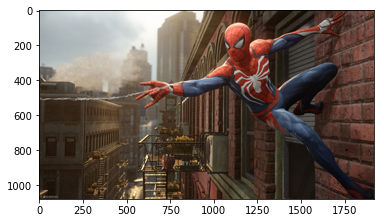

In [9]:
image = loadImage(path='inception/spidy.jpg')
plotImage(image)

Tensor("conv2d2:0", shape=(?, ?, ?, 192), dtype=float32, device=/device:CPU:0)
After : 


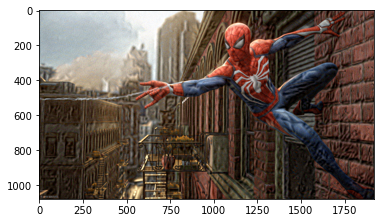

In [10]:
layer_tensor = model.layer_tensors[2]
print(layer_tensor)
finalImage = genDeepDream(layerName=layer_tensor,image=image,stepSize=5.0)
saveImage(finalImage,path='inception/layer2Dream.jpg')

Tensor("mixed3a:0", shape=(?, ?, ?, 256), dtype=float32, device=/device:CPU:0)
After : 


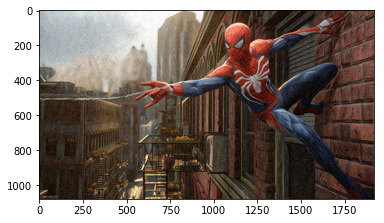

In [11]:
layer_tensor = model.layer_tensors[3]
print(layer_tensor)
finalImage = genDeepDream(layerName=layer_tensor,image=image,stepSize=5.0)
saveImage(finalImage,path='inception/layer3Dream.jpg')

Tensor("mixed4a:0", shape=(?, ?, ?, 508), dtype=float32, device=/device:CPU:0)
After : 


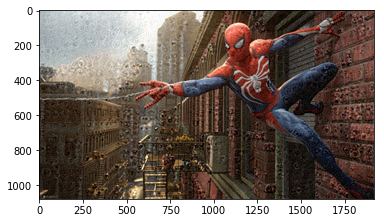

In [12]:
layer_tensor = model.layer_tensors[5]
print(layer_tensor)
finalImage = genDeepDream(layerName=layer_tensor,image=image,stepSize=5.0)
saveImage(finalImage,path='inception/layer5Dream.jpg')

Tensor("mixed4b:0", shape=(?, ?, ?, 512), dtype=float32, device=/device:CPU:0)
After : 


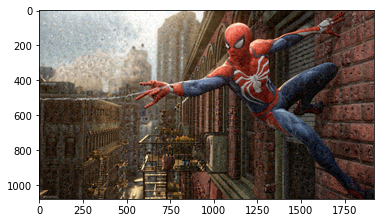

In [13]:
layer_tensor = model.layer_tensors[6]
print(layer_tensor)
finalImage = genDeepDream(layerName=layer_tensor,image=image,stepSize=5.0)
saveImage(finalImage,path='inception/layer6Dream.jpg')

Tensor("mixed4c:0", shape=(?, ?, ?, 512), dtype=float32, device=/device:CPU:0)
After : 


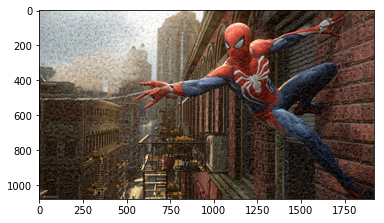

In [14]:
layer_tensor = model.layer_tensors[7]
print(layer_tensor)
finalImage = genDeepDream(layerName=layer_tensor,image=image,stepSize=5.0)
saveImage(finalImage,path='inception/laye7Dream.jpg')

Tensor("mixed4e:0", shape=(?, ?, ?, 832), dtype=float32, device=/device:CPU:0)
After : 


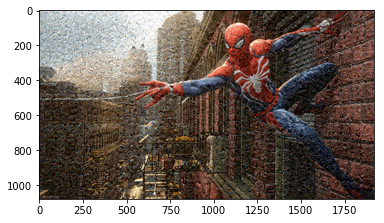

In [ ]:
layer_tensor = model.layer_tensors[9]
print(layer_tensor)
finalImage = genDeepDream(layerName=layer_tensor,image=image,stepSize=3.0)
saveImage(finalImage,path='inception/laye9Dream.jpg')

In [ ]:
layer_tensor = model.layer_tensors[10]
print(layer_tensor)
finalImage = genDeepDream(layerName=layer_tensor,image=image,stepSize=3.0)
saveImage(finalImage,path='inception/laye7Dream.jpg')

Tensor("mixed5a:0", shape=(?, ?, ?, 832), dtype=float32, device=/device:CPU:0)
